<a href="https://colab.research.google.com/github/Amitesh-191885/Analysis/blob/main/ProjectsY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning - Regression
**Project -1**

## Mileage Prediction - Regression Analysis


**Source:**
This dataset was taken from the StatLib Library which is maintained at Camegie Mellon University. The dataset was used in the 1983 american Statistical Association Exposition
**Data Set Information:**
This dataset is slightly modified version of the dataset provided tin the StatLib library. In line with te use by Ross Quirian (1993) in predicting the attribute 'mpg', 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is availabe in the file "auto-mpg data-original" 

"The data concerns city-cycle fuel consumptin in miles per galion, to be predicted in tems of 3 multivalued discrete and 5 continous attributed" (Quanian 1993)

**Attribute INformation:**


1.   mpg: continuous 
2.  cylinders: Malti-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name : string(unique for each instances)

file Path: https://github.com/YBI-Foundation/Dataset/blob/main/MPG.csv



*Import Library*

pandas 

numpy

matplotlib.pyplot

seaborn

In [66]:
#Library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

**Import Data**

In [70]:
url = 'https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv'
df = pd.read_csv(url)

In [71]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [73]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

**Data Preprocession**

In [74]:
#for check any missing value and information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [75]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [76]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In the data set there is missing 6 value of horsepower, because all are 398, but horsepower count is 392 so that it has missing 6 value.

And In the data set there is two lebel 'displacement' and 'cylinders' are highly correlated. so we use only one of them. 

Displacement =  no of cylinder * volume of cylinder

but, in dataset  , missing voulume of cylinder so we use displacement instead of cylinder.


**Remove Missing Value**

In [77]:
data = df.dropna()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [79]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Now No any missing value.

**Data Visualization**

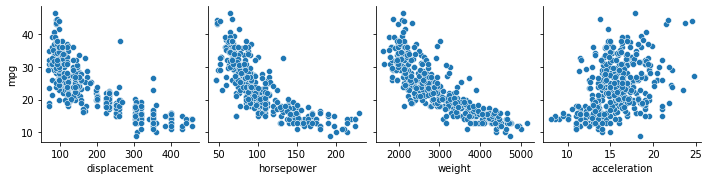

In [80]:
#Pair plot for visualization
sns.pairplot(data, x_vars = ['displacement', 'horsepower', 'weight', 'acceleration'] , y_vars=['mpg'])

In pairplot we see  that 
*  mpg - displacement  negative correleation
*  mpg- horsepower negative correlation
* mpg - weight negative correlation
*  mpg - acceleration positive correlation

Text(0, 0.5, 'mpg')

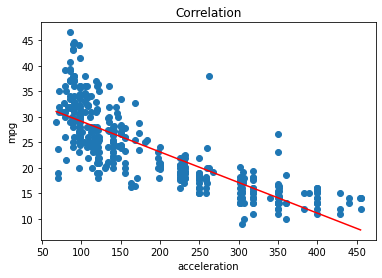

In [85]:
X=data['displacement']
Y=data['mpg']
plt.title('Correlation')
# plot the data
plt.scatter(X, Y)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1)) (np.unique(X)), color='red')

plt.xlabel('acceleration')
plt.ylabel('mpg')

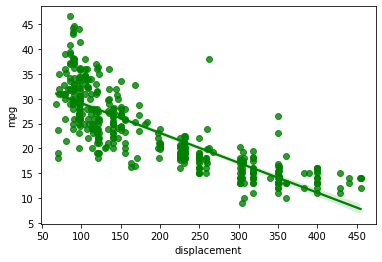

In [81]:
sns.regplot(x='displacement', y='mpg',data=data,color='g');

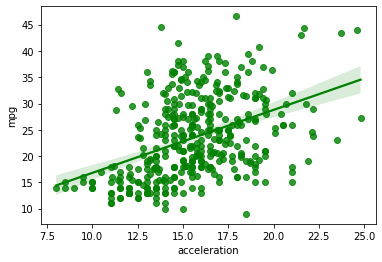

In [82]:
sns.regplot( x='acceleration',y='mpg',data=data,color='g')

Text(0, 0.5, 'mpg')

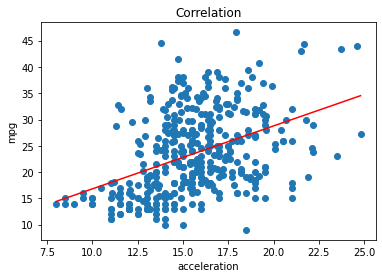

In [84]:
X=data['acceleration']
Y=data['mpg']
plt.title('Correlation')
# plot the data
plt.scatter(X, Y)

plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1)) (np.unique(X)), color='red')

plt.xlabel('acceleration')
plt.ylabel('mpg')

**Define Target Variable y and Feature x**

In [ ]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [ ]:
y = data['mpg']

In [ ]:
y.shape

(392,)

In [ ]:
x=data[['displacement', 'horsepower', 'weight', 'acceleration']]
x.shape

(392, 4)

In [ ]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


In [ ]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**Scaling of Data**
For scalling the x 

In [ ]:
#import library
from sklearn.preprocessing import StandardScaler
 

In [ ]:
scale = StandardScaler()

In [ ]:
X = scale.fit_transform(x)

In [ ]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

**Train Test Split data**

In [ ]:
#import 
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.7, random_state=2529)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Modle**

In [ ]:
#import library
from sklearn.linear_model import LinearRegression

In [ ]:
Lr = LinearRegression()

In [ ]:
Lr.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Lr.intercept_

23.485738559737584

In [ ]:
Lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Mileage = 23.48 - 1.05displacement -1.68horsepower -4.10weight -0.11acceleration +error**

 -
 

**Predict Test Data**

In [ ]:
y_pred = Lr.predict(X_test)

In [ ]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

**Model Accuracy**

In [ ]:
#import required library
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

In [ ]:
error = mean_absolute_error(Y_test,y_pred)

In [ ]:
percnterror = mean_absolute_percentage_error(Y_test,y_pred)

In [ ]:
print(error,"   " ,percnterror)

3.3286968643244106     0.14713035779536746


In [ ]:
r2_score(Y_test,y_pred)

0.7031250746717692

**We see  that the model is no linear somthing like degree 2 curvature so we need polynomial regression.**

### Polynomial Regression

In [ ]:
#import and fit the data set for polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False,order='F')

In [ ]:
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

In [ ]:
Lr.fit(X_train2,Y_train)

LinearRegression()

In [ ]:
Lr.intercept_

21.273364500637655

In [ ]:
Lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [ ]:
#Pridict the now polynomial regression

y_pred_poly = Lr.predict(X_test2)

**Model Accuracy** check

In [ ]:
mean_absolute_error(Y_test,y_pred_poly)

2.788714772029598

In [ ]:
mean_absolute_percentage_error(Y_test, y_pred_poly)

0.12074018342938689

In [ ]:
print("Previously error ={} and percentage error is {}".format(error,percnterror))

Previously error =3.3286968643244106 and percentage error is 0.14713035779536746


In [ ]:
r2_score(Y_test,y_pred_poly)

0.7461731314563802

# Supervised Machine Learing - Classification
**Project - 2**

## Hand Written Digit Prediction - Classification Analysis

**The digitts dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values of each image. We will use theese arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents**

Data set availabe in sklearn library

*Import Library*

In [87]:
#import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*Import Data*

In [88]:
from sklearn.datasets import load_digits
df = load_digits()

In [89]:
df

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

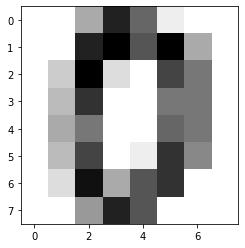

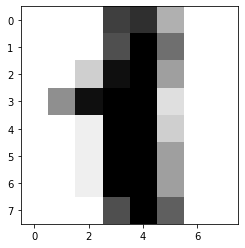

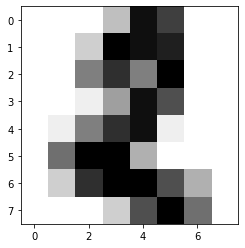

In [91]:
for i in range(3):
  plt.figure()
  plt.imshow(df.images[i], cmap = plt.cm.gray_r, interpolation = 'nearest')
  plt.show()

**Data Preprocession**

Flatten Image

In [15]:
#shape
df.images.shape

(1797, 8, 8)

In [16]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [17]:
df.images[0].shape

(8, 8)

In [18]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [19]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [20]:
data[0].shape

(64,)

In [21]:
data.shape

(1797, 64)

*Scaling Data*

In [23]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [24]:
data.min()

0.0

In [25]:
data.max()

16.0

In [37]:
#Max value is 16 so we need to scale of 1
data = data/16

In [38]:
data.min()

0.0

In [39]:
data.max()

1.0

In [40]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [41]:
data

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

**Train Test Split Data**

In [43]:
from sklearn.model_selection import train_test_split


In [54]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3, random_state=2529)

In [55]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

### Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
model = RandomForestClassifier()

In [58]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
#Predict Test Data
y_predic = model.predict(x_test)

In [60]:
y_predic

array([1, 9, 4, 1, 1, 0, 6, 9, 6, 0, 0, 9, 6, 4, 5, 6, 8, 8, 8, 3, 0, 1,
       2, 0, 8, 3, 1, 1, 7, 5, 0, 4, 1, 9, 5, 5, 4, 7, 1, 5, 7, 5, 7, 3,
       3, 7, 6, 1, 9, 8, 0, 9, 7, 1, 9, 3, 4, 0, 8, 3, 0, 9, 8, 1, 5, 5,
       0, 5, 7, 9, 5, 2, 6, 8, 4, 2, 2, 2, 8, 0, 4, 2, 1, 0, 7, 5, 5, 2,
       1, 4, 9, 2, 4, 8, 2, 4, 9, 5, 4, 5, 1, 7, 1, 7, 7, 4, 2, 0, 0, 5,
       1, 5, 7, 0, 1, 1, 5, 2, 5, 6, 8, 5, 7, 1, 1, 8, 9, 6, 9, 8, 7, 8,
       7, 4, 7, 2, 9, 1, 8, 1, 2, 0, 8, 1, 2, 6, 3, 2, 3, 3, 1, 2, 1, 6,
       9, 8, 9, 1, 4, 1, 7, 4, 5, 9, 1, 0, 6, 1, 3, 8, 1, 0, 7, 2, 3, 5,
       5, 5, 1, 9, 5, 9, 5, 0, 1, 0, 3, 2, 9, 0, 8, 3, 5, 7, 3, 9, 8, 7,
       4, 8, 6, 7, 9, 2, 6, 0, 6, 0, 7, 3, 1, 6, 2, 4, 6, 8, 5, 6, 2, 6,
       5, 8, 7, 4, 2, 8, 9, 9, 3, 1, 4, 4, 7, 9, 1, 6, 3, 1, 9, 6, 4, 5,
       0, 4, 2, 9, 0, 2, 0, 3, 8, 1, 2, 9, 1, 5, 2, 7, 0, 7, 9, 6, 6, 3,
       1, 6, 3, 3, 6, 1, 1, 3, 5, 7, 8, 1, 5, 1, 0, 3, 7, 2, 8, 8, 7, 8,
       8, 3, 3, 5, 9, 5, 7, 2, 0, 7, 7, 0, 6, 4, 1,

**Model Accuracy**

In [61]:
from sklearn.metrics import confusion_matrix, classification_report 

In [63]:
confusion_matrix(y_test, y_predic)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1, 56,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  1, 50,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 50,  0,  0],
       [ 0,  3,  0,  1,  0,  1,  0,  0, 48,  0],
       [ 0,  0,  0,  2,  0,  1,  0,  1,  0, 49]])

In [65]:
print(classification_report(y_test, y_predic))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.96      1.00      0.98        64
           2       1.00      1.00      1.00        61
           3       0.94      0.96      0.95        52
           4       0.98      0.98      0.98        54
           5       0.93      0.97      0.95        58
           6       1.00      0.96      0.98        52
           7       0.98      1.00      0.99        50
           8       0.92      0.91      0.91        53
           9       1.00      0.92      0.96        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

